<a href="https://colab.research.google.com/github/jfestradan/Modelado-y-simulacion/blob/master/Proyecto_Final_Modelado_y_Simulaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelo tridimensional caótico, con aplicaciones en circuitos electrónicos.
Este artículo investiga el análisis de bifurcación de un sistema caótico propuesto mediante un parámetro seleccionado. El sistema caótico ha sido investigado por análisis numéricos y teóricos detallados. Los valores de amplitud son importantes en los sistemas caóticos para aplicaciones en entornos reales debido a las limitaciones de los componentes y materiales electrónicos.

## Se describe con las ecuaciones iniciales:

$$ \frac{dx}{dt}=a(x-y) $$
$$ \frac{dy}{dt}=-4ay+xz+mx^3 $$
$$ \frac{dz}{dt}=-adz+x^3y+bz^2 $$

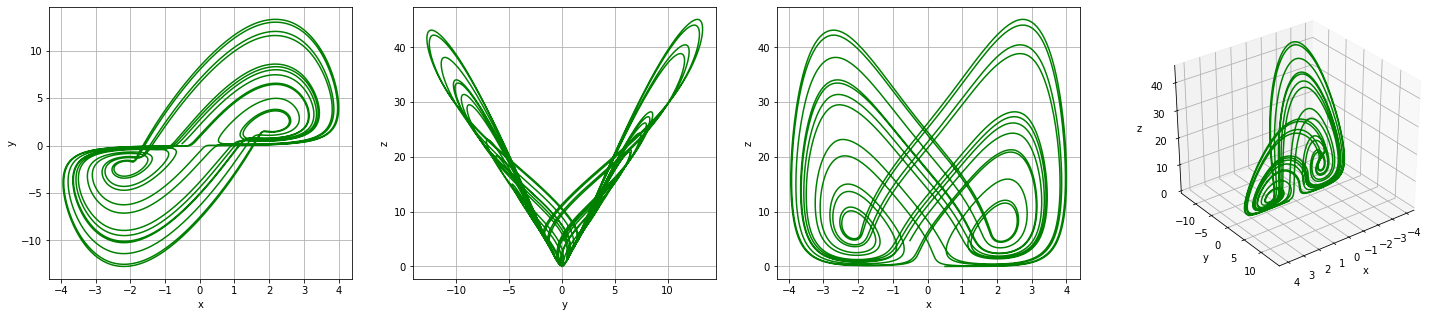

In [54]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time

def model (t,y,a,b,d,m):
  return [a*(y[0]-y[1]),-4*a*y[1]+y[0]*y[2]+m*y[0]**3,-a*d*y[2]+(y[0]**3)*y[1]+b*y[2]**2]

a,b=0,50
t= np.linspace(a,b,10000)
y0=[0.5,0,0]

sol=solve_ivp(model,[a,b],y0,args=(1.8,-0.07,1.5,0.12),t_eval=t)
fig = plt.figure(figsize=[25,5])


ax = fig.add_subplot(1,4,1)
l=ax.plot(sol.y[0], sol.y[1],'g')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.grid(True)

ax = fig.add_subplot(1,4,2)
m=ax.plot(sol.y[1], sol.y[2],'g')
ax.set_ylabel('z')
ax.set_xlabel('y')
ax.grid(True)

ax = fig.add_subplot(1,4,3)
m=ax.plot(sol.y[0], sol.y[2],'g')
ax.set_ylabel('z')
ax.set_xlabel('x')
ax.grid(True)

ax = fig.add_subplot(1,4,4,projection='3d')
n=ax.plot3D(sol.y[0],sol.y[1],sol.y[2],'g')
ax.grid(True)
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_zlabel('z')
ax.view_init(33,53)

plt.show()

##Bifurcations 

time= 105.641335


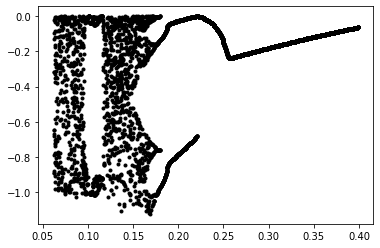

In [55]:
def model (t,y,a,b,d,m):
  return [a*(y[0]-y[1]),-4*a*y[1]+y[0]*y[2]+m*y[0]**3,-a*d*y[2]+(y[0]**3)*y[1]+b*y[2]**2]

def event_model (t,y,a,b,d,m):
  return y[0]+y[1]+y[2]

event_model.direction=-1

a,b=0,100
t= np.linspace(a,b,10000)
y0=[0.5,0,0]
tic=time.clock()
for r in np.arange(0.062,0.4,0.001):
  sol=solve_ivp(model,[a,b],y0,args=(1.8,-0.07,1.5,r),t_eval=t,events=event_model,rtol=1e-4,atol=1e-7)
  k=sol.y_events[0]
  #print(sol.y[:,-1])
  #print(len(sol.t_events[0]))
  for i in range(len(sol.t_events[0])):
    if sol.t_events[0][i]>20:
      plt.plot(r,sol.y_events[0][i,1],".",color="black")
  y0=sol.y[:,-1]
toc=time.clock()
print("time=",toc-tic)





time= 42.942695000000015


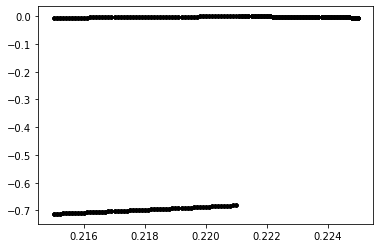

In [58]:
def model (t,y,a,b,d,m):
  return [a*(y[0]-y[1]),-4*a*y[1]+y[0]*y[2]+m*y[0]**3,-a*d*y[2]+(y[0]**3)*y[1]+b*y[2]**2]

def event_model (t,y,a,b,d,m):
  return y[0]+y[1]+y[2]

event_model.direction=-1

a,b=0,100
t= np.linspace(a,b,10000)
y0=[0.5,0,0]
tic=time.clock()
for r in np.arange(0.215,0.225,0.0001):
  sol=solve_ivp(model,[a,b],y0,args=(1.8,-0.07,1.5,r),t_eval=t,events=event_model,rtol=1e-5,atol=1e-7)
  k=sol.y_events[0]
  #print(sol.y[:,-1])
  #print(len(sol.t_events[0]))
  for i in range(len(sol.t_events[0])):
    if sol.t_events[0][i]>20:
      plt.plot(r,sol.y_events[0][i,1],".",color="black")
  y0=sol.y[:,-1]
toc=time.clock()
print("time=",toc-tic)

time= 202.61485799999997


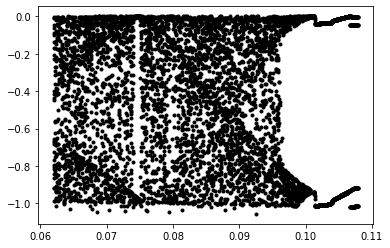

In [59]:

def model (t,y,a,b,d,m):
  return [a*(y[0]-y[1]),-4*a*y[1]+y[0]*y[2]+m*y[0]**3,-a*d*y[2]+(y[0]**3)*y[1]+b*y[2]**2]

def event_model (t,y,a,b,d,m):
  return y[0]+y[1]+y[2]

event_model.direction=-1

a,b=0,100
t= np.linspace(a,b,10000)
y0=[0.5,0,0]
tic=time.clock()
for r in np.arange(0.062,0.108,0.0001):
  sol=solve_ivp(model,[a,b],y0,args=(1.8,-0.07,1.5,r),t_eval=t,events=event_model,rtol=1e-5,atol=1e-7)
  k=sol.y_events[0]
  #print(sol.y[:,-1])
  #print(len(sol.t_events[0]))
  for i in range(len(sol.t_events[0])):
    if sol.t_events[0][i]>20:
      plt.plot(r,sol.y_events[0][i,1],".",color="black")
   
  y0=sol.y[:,-1]
toc=time.clock()
print("time=",toc-tic)

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.animation import ArtistAnimation
import numpy as np
from scipy.integrate import odeint
fig=plt.figure()
mo = -1/7
m1 = 2/7
tmax = 100;

b=-0.07
d=1.5
m=0.12
x0=[0.5,0,0]
def chua(x, t):
  return[a*(x[1]-(m1*x[0]+(mo-m1)/2*(np.abs(x[0]+1)-np.abs(x[0]-1)))),x[0]-x[1]+x[2],-15*x[1]]
  #[a*(y[0]-y[1]),-4*a*y[1]+y[0]*y[2]+m*y[0]**3,-a*d*y[2]+(y[0]**3)*y[1]+b*y[2]**2]

time = np.arange(0, tmax, 0.1)

myimages = []
for a in np.arange(8, 11, 0.1):
  xs = odeint(chua, x0, time)
  imgplot = plt.plot(xs[:, 0], xs[:, 1], "r-")
  myimages.append(imgplot)
  my_anim=ArtistAnimation(fig, myimages, interval=500,\
  blit=False, repeat_delay=500)
  plt.show()
  

La sensibilidad a las condiciones iniciales significa que cualquier perturbación arbitrariamente pequeña en el estado inicial del sistema puede conducir a un comportamiento significativamente distante del estado futuro del sistema caótico. Esta dependencia de las condiciones iniciales en el sistema hace imposible la predicción a largo plazo. Las series de tiempo obtenidas  para y = 0 e y = 0.001 se presentaron en la siguiente gráfica. Muestra que la evolución de las trayectorias del caos es muy sensible a las condiciones iniciales.

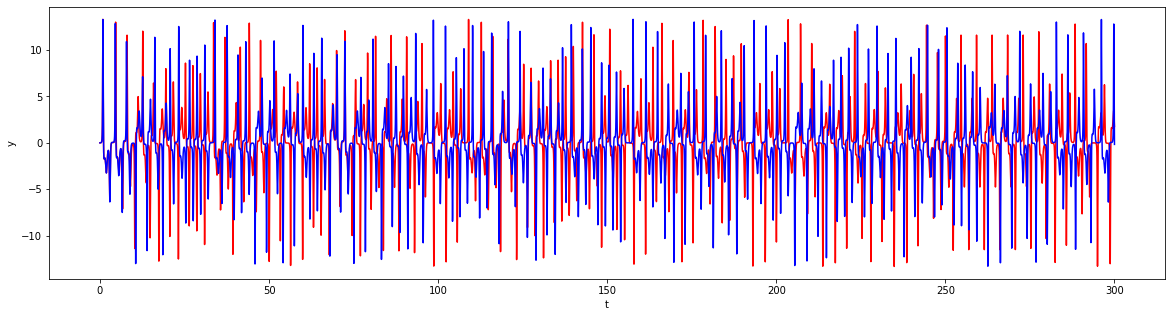

In [11]:
def model (t,y,a,b,d,m):
  return [a*(y[0]-y[1]),-4*a*y[1]+y[0]*y[2]+m*y[0]**3,-a*d*y[2]+(y[0]**3)*y[1]+b*y[2]**2]

a,b=0,500
t= np.linspace(a,b,1000000)
y0=[0.5,0,0]
y01=[0.5,0.001,0]
sol=solve_ivp(model,[a,b],y0,args=(1.8,-0.07,1.5,0.12),t_eval=t)
sol1=solve_ivp(model,[a,b],y01,args=(1.8,-0.07,1.5,0.12),t_eval=t)

t1 = np.linspace(0,300,1000000)
fig = plt.figure(figsize=[20,5])
j=fig.add_subplot(1,1,1)
j.set_ylabel('y')
j.set_xlabel('t')
j.plot(t1,sol.y[1],'r')
j.plot(t1,sol1.y[1],'b')


Los valores de amplitud son importantes en los sistemas caóticos para aplicaciones en entornos reales debido a las limitaciones de los componentes y materiales electrónicos. Para evitar la propiedad de saturación de componentes electrónicos como los multiplicadores analógicos y los amplificadores operacionales, los valores de amplitud de los sistemas caóticos generalmente se reducen mediante un cambio de escala lineal de las variables.

Asumiendo que u = x, v= y/5 y w=z/10. Si se establecen las variables de estado originales x, y, z en lugar de las variables u; v; w, el sistema reescalado se convierte en lo siguiente.

## Sistema Reescalado:

$$ \frac{du}{dt}=a(u)-5av $$
$$ \frac{dv}{dt}=-4av+2uw+(m/5)u^3 $$
$$ \frac{dw}{dt}=-adw+0.5u^3v+10bw^2 $$
 
 

 
Los nuevos diagramas de fase del sistema caótico reescalado con a = 1.8, b = −0.07, d = 1.5, m = 0.12 son:

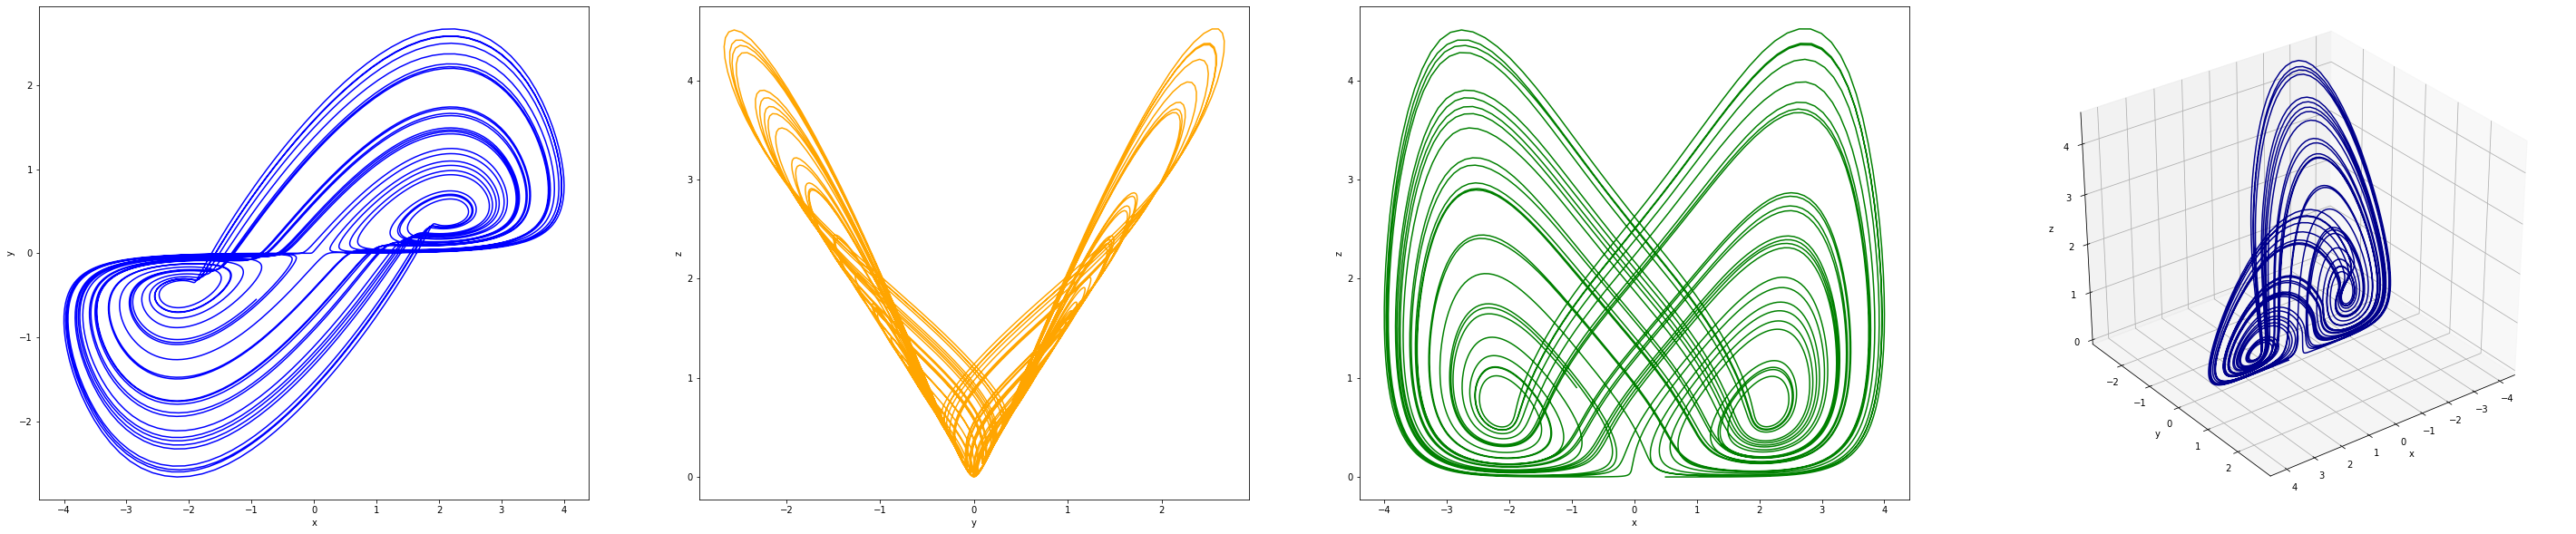

In [51]:

def escala (t,y,a,b,d,m):
  return [a*y[0]-5*a*y[1],-4*a*y[1]+2*y[0]*y[2]+(m/5)*y[0]**3,-a*d*y[2]+0.5*(y[0]**3)*y[1]+10*b*y[2]**2]

a,b=0,100
t= np.linspace(a,b,10000)
y0=[0.5,0,0]

sol=solve_ivp(escala,[a,b],y0,args=(1.8,-0.07,1.5,0.12),t_eval=t)
fig = plt.figure(figsize=[50,10])


ax = fig.add_subplot(1,4,1)
l=ax.plot(sol.y[0], sol.y[1],'b')
ax.set_ylabel('y')
ax.set_xlabel('x')

ax = fig.add_subplot(1,4,2)
m=ax.plot(sol.y[1], sol.y[2],'orange')
ax.set_ylabel('z')
ax.set_xlabel('y')

ax = fig.add_subplot(1,4,3)
m=ax.plot(sol.y[0], sol.y[2],'g')
ax.set_ylabel('z')
ax.set_xlabel('x')

ax = fig.add_subplot(1,4,4,projection='3d')
n=ax.plot3D(sol.y[0],sol.y[1],sol.y[2],'darkblue')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_zlabel('z')
ax.view_init(33,53)
plt.show()